<a href="https://colab.research.google.com/github/mohandabdelhalim99/Automation_Scripts/blob/main/Extract_table_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import camelot as cm
import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
PDF_Tables=cm.read_pdf("DB Lab2.pdf",flavor='lattice',pages='all',col_tol=6)

In [81]:
type(PDF_Tables)

camelot.core.TableList

In [82]:
for table in PDF_Tables:
  print(table)

<Table shape=(9, 9)>
<Table shape=(4, 4)>
<Table shape=(18, 3)>
<Table shape=(8, 5)>
<Table shape=(9, 4)>


In [83]:
table_1=PDF_Tables[0].df
table_1=table_1.iloc[1:,:]

In [84]:
table_1.rename(columns={0:"Fname",1:"Lname",2:"SSN",3:"BDate",4:"Add",5:"SEX",6:"Salary",7:"Superssn",8:"Dno"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
table_1.head()

,Fname,Lname,SSN,BDate,Add,SEX,Salary,Superssn,Dno
1,Ahmed Ali,,112233,1/1/1965,15 Ali fahmy \nSt.Giza,M,1300,223344,10
2,Kamel,Mohamed,223344,15/10/1970,38 Mohy el dien \nabo el Ezz \nSt.Cairo,M,1800,321654,10
3,Hanaa,Sobhy,123456,18/3/1973,38 Abdel Khalik \nTharwat St. \nDowntown.Cairo,F,800,223344,10
4,Amr,Omran,321654,14/9/1963,44 Hilopolis.Cairo,M,2500,null,null
5,Noha,Mohamed,968574,1/2/1975,55 Orabi St. El \nMohandiseen \n.Cairo,F,1600,321654,20


In [86]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fname     8 non-null      object
 1   Lname     8 non-null      object
 2   SSN       8 non-null      object
 3   BDate     8 non-null      object
 4   Add       8 non-null      object
 5   SEX       8 non-null      object
 6   Salary    8 non-null      object
 7   Superssn  8 non-null      object
 8   Dno       8 non-null      object
dtypes: object(9)
memory usage: 708.0+ bytes


In [114]:
table_1['Salary']=table_1['Salary'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
table_1['Superssn']=table_1['Superssn'].replace('null',0)
table_1['Dno']=table_1['Superssn'].replace('null','NanDP')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
max_sal=table_1.groupby('SEX')[['Salary']].max()

In [119]:
max_sal.reset_index(inplace=True)


In [121]:
max_sal

,SEX,Salary
0,F,1600.0
1,M,2500.0


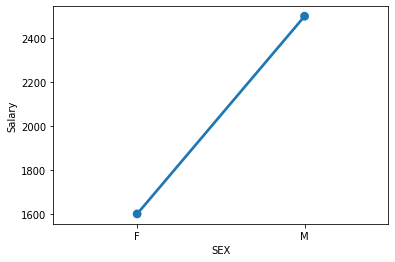

In [123]:
sns.pointplot(x='SEX',y='Salary',data=max_sal)